## Principal Component Analysis

### What is PCA
- PCA is a dimensionality reduction technique.
- PCA doesn't remove features/dimensions. PCA combines the variables to new features. These features are called principal components.
- PCA transforms the data to a new coordinate system such that greatest variance lie on the first coordinate (called the first principal component)
- Variance equals information. More variance -> More information.
- Reducing dimensions with PCA can distort the pairwise euclidean distance between the points.

### Implementing PCA with Python

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Generate sample dataset
x, y = make_blobs(n_samples=1000, n_features=3, centers=3, random_state=0, cluster_std=[1, 2, 3], center_box=(10.0, 65))

In [3]:
#standardize the features
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [4]:
#create a dataframe with features x and label y
col_names = [f"x{idx}" for idx in range(x.shape[1])]
df = pd.DataFrame(x, columns=col_names)
df["cluster_label"] = y

In [5]:
#Return the first five rows of the dataframe
df.head()

,x0,x1,x2,cluster_label
0,-0.366353,1.022466,1.166899,2
1,-1.179214,1.318905,1.047407,2
2,0.346441,-1.360488,-0.417740,1
3,0.507115,0.055279,-0.890964,0
4,-0.185192,0.937566,0.930304,2


In [6]:
df[col_names]

,x0,x1,x2
0,-0.366353,1.022466,1.166899
1,-1.179214,1.318905,1.047407
2,0.346441,-1.360488,-0.417740
3,0.507115,0.055279,-0.890964
4,-0.185192,0.937566,0.930304
...,...,...,...
995,0.474014,0.190684,-0.943930
996,-1.272723,0.995603,1.102096
997,0.682884,0.165590,-0.640817
998,0.234362,0.022165,-0.866339


In [7]:
pca = PCA()
_ = pca.fit_transform(df[col_names])

In [8]:
pc_components = np.arange(pca.n_components_)+1

### Plotting Explained Variance

Text(0.5, 1.0, 'Scree plot')

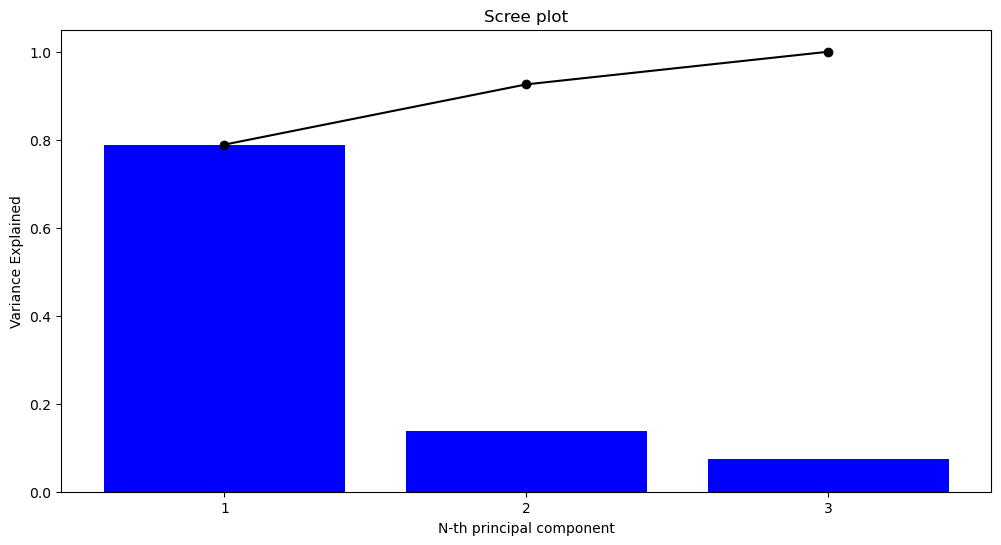

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.bar(x=pc_components, height=pca.explained_variance_ratio_, color="b")
ax.plot(pc_components, np.cumsum(pca.explained_variance_ratio_), color="black", linestyle="-", marker="o")
ax.set_xticks(pc_components)
ax.set_xlabel("N-th principal component")
ax.set_ylabel("Variance Explained")
ax.set_title("Scree plot")

In [10]:
pc_components

array([1, 2, 3])

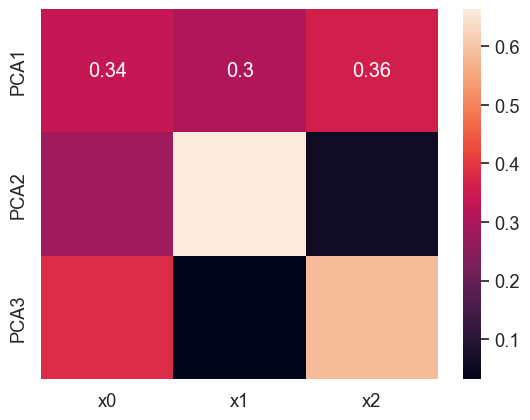

In [15]:
_ = sns.set(style='whitegrid', font_scale=1.2)
_ = sns.heatmap(pca.components_ ** 2, 
                yticklabels=["PCA"+str(x) for x in range(1,pca.n_components_+1)],
                xticklabels=list(col_names),
               annot=True)